Saving advertising_sales_data.xlsx to advertising_sales_data (1).xlsx
1. Average TV advertising spend: $146.79
2. Correlation between Radio spend and Sales: 0.35
3. Correlation of each advertising medium with Sales:
 TV           0.901372
Radio        0.349728
Newspaper    0.159125
dtype: float64
   --> Highest impact on Sales: TV


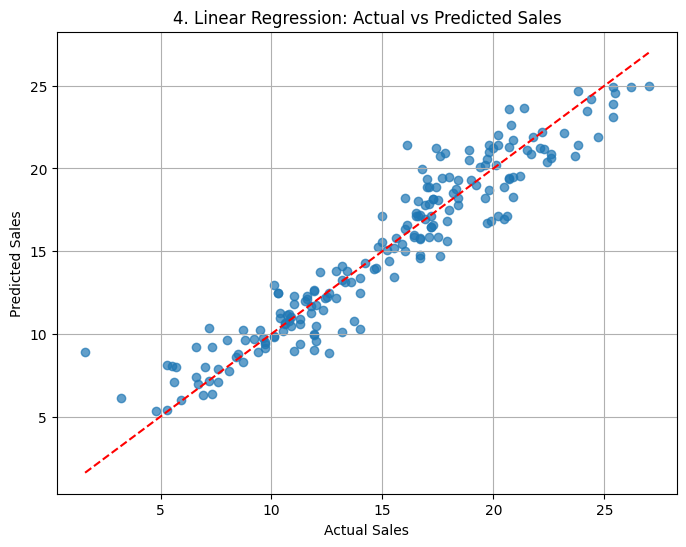

5. Predicted sales for TV=$200, Radio=$40, Newspaper=$50: 19.82
6. R² without normalization: 0.9029
   R² with normalization:    0.9029
7. R² using only Radio and Newspaper: 0.1237


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from google.colab import files
uploaded = files.upload()
df = pd.read_excel("advertising_sales_data.xlsx")
df = df.dropna()
# 1. Average amount spent
avg_tv = df['TV'].mean()
print(f"1. Average TV advertising spend: ${avg_tv:.2f}")
# 2. Correlation between radio advertising and sales
corr_radio_sales = df['Radio'].corr(df['Sales'])
print(f"2. Correlation between Radio spend and Sales: {corr_radio_sales:.2f}")
# 3. Advertising medium with the highest impact
correlations = df[['TV', 'Radio', 'Newspaper']].corrwith(df['Sales'])
print("3. Correlation of each advertising medium with Sales:\n", correlations)
highest_impact = correlations.abs().idxmax()
print(f"   --> Highest impact on Sales: {highest_impact}")
# 4. Linear regression Applies
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('4. Linear Regression: Actual vs Predicted Sales')
plt.grid(True)
plt.show()
# 5. Sales Prediction
new_data = np.array([[200, 40, 50]])
predicted_sales = model.predict(new_data)[0]
print(f"5. Predicted sales for TV=$200, Radio=$40, Newspaper=$50: {predicted_sales:.2f}")
# 6. Model performance with normalization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
model_norm = LinearRegression()
model_norm.fit(X_scaled, y)
y_pred_norm = model_norm.predict(X_scaled)
r2 = r2_score(y, y_pred)
r2_norm = r2_score(y, y_pred_norm)
print(f"6. R² without normalization: {r2:.4f}")
print(f"   R² with normalization:    {r2_norm:.4f}")
# 7. Impact using only Radio and Newspaper
X_rn = df[['Radio', 'Newspaper']]
model_rn = LinearRegression()
model_rn.fit(X_rn, y)
y_pred_rn = model_rn.predict(X_rn)
r2_rn = r2_score(y, y_pred_rn)
print(f"7. R² using only Radio and Newspaper: {r2_rn:.4f}")